In [1]:
import pandas as pd
import os

def split_csv(file_path):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Shuffle the dataset to ensure randomness
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Calculate split indices
    total_rows = len(df)
    split_1 = int(0.6 * total_rows)
    split_2 = split_1 + int(0.2 * total_rows)
    split_3 = split_2 + int(0.1 * total_rows)
    
    # Split the dataframe
    df1 = df[:split_1]
    df2 = df[split_1:split_2]
    df3 = df[split_2:split_3]
    df4 = df[split_3:]
    
    # Get the directory and base filename
    dir_name, base_name = os.path.split(file_path)
    file_name, ext = os.path.splitext(base_name)
    
    # Save the split files
    df1.to_csv(os.path.join(dir_name, f"{file_name}_60{ext}"), index=False)
    df2.to_csv(os.path.join(dir_name, f"{file_name}_20{ext}"), index=False)
    df3.to_csv(os.path.join(dir_name, f"{file_name}_10a{ext}"), index=False)
    df4.to_csv(os.path.join(dir_name, f"{file_name}_10b{ext}"), index=False)

    print("CSV split into 60%, 20%, 10%, and 10% successfully.")

# Example usage
split_csv(r"/home/saipranav/Desktop/fedl/exp/x.csv")  # Replace with your actual CSV file path


CSV split into 60%, 20%, 10%, and 10% successfully.


In [4]:
import pandas as pd
import os

def split_csv(file_path):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Shuffle the dataset to ensure randomness
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Define split percentages (they should sum to 100)
    percentages = [20, 15, 20, 5, 10, 5, 5, 5, 10, 5]
    
    # Calculate the split indices
    total_rows = len(df)
    split_indices = [int(p * total_rows / 100) for p in percentages]

    # Ensure the sum of split indices equals total_rows (adjust last split)
    split_indices[-1] += total_rows - sum(split_indices)

    # Split the dataframe
    start = 0
    dir_name = os.path.dirname(file_path)  # Get directory

    for i, size in enumerate(split_indices):
        df_part = df[start:start + size]
        df_part.to_csv(os.path.join(dir_name, f"part_{i+1}.csv"), index=False)
        start += size

    print("CSV successfully split into 10 parts.")

# Example usage
split_csv(r"/home/saipranav/Desktop/fedl/10c/x.csv")  # Replace with your actual CSV file path


CSV successfully split into 10 parts.


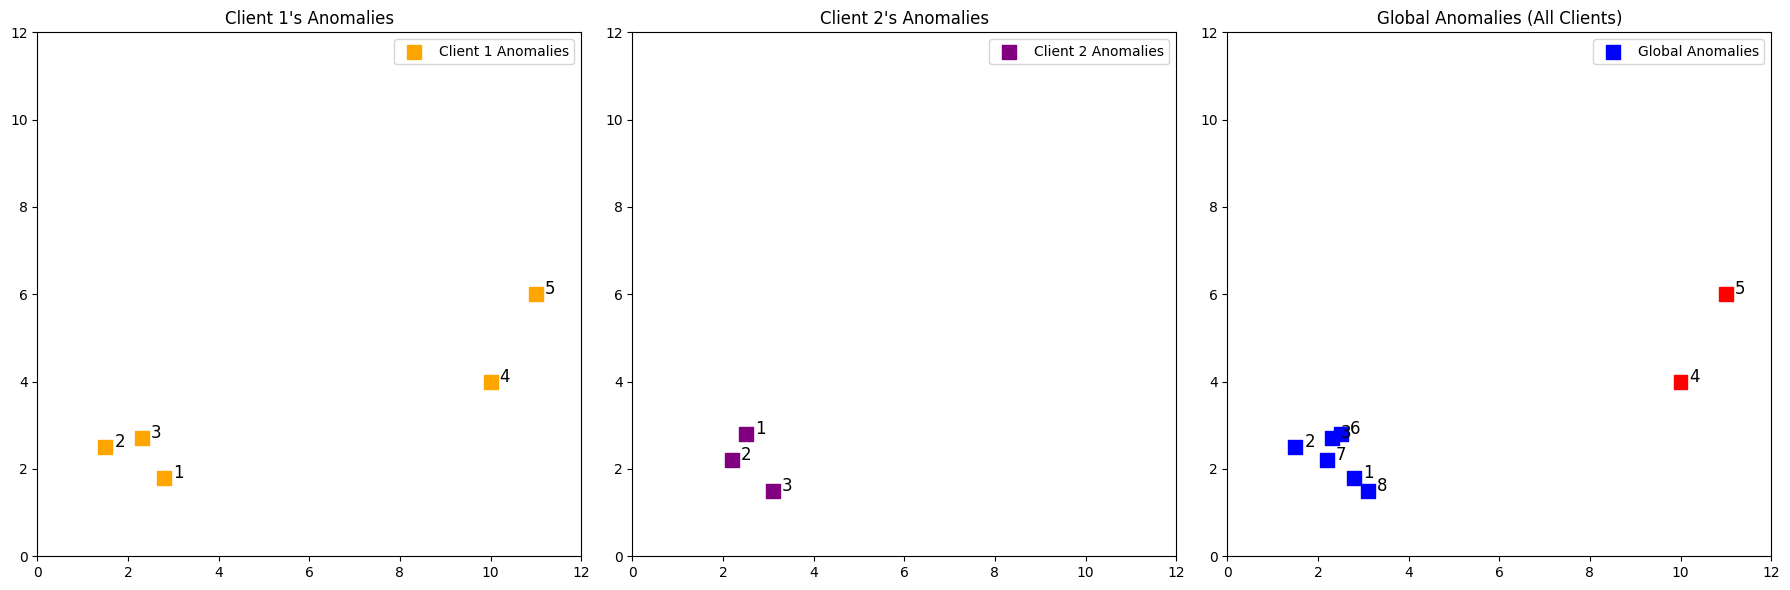

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define Client 1's local anomalies
client1_anomalies_x = [2.8, 1.5, 2.3, 10, 11]
client1_anomalies_y = [1.8, 2.5, 2.7, 4, 6]

# Define Client 2's local anomalies
client2_anomalies_x = [2.5, 2.2, 3.1]
client2_anomalies_y = [2.8, 2.2, 1.5]

# Define global anomalies (combining local anomalies)
global_anomalies_x = client1_anomalies_x + client2_anomalies_x
global_anomalies_y = client1_anomalies_y + client2_anomalies_y

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define fixed axis range for consistency
x_min, x_max = 0, 12
y_min, y_max = 0, 12

# Function to annotate points with numbers
def annotate_points(ax, x, y):
    for i, (xi, yi) in enumerate(zip(x, y), 1):
        ax.text(xi + 0.2, yi, str(i), fontsize=12, color='black')

# Plot Client 1's anomalies
axes[0].scatter(client1_anomalies_x, client1_anomalies_y, c='orange', marker='s', s=100, label="Client 1 Anomalies")
axes[0].set_title("Client 1's Anomalies")
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)
axes[0].legend()
annotate_points(axes[0], client1_anomalies_x, client1_anomalies_y)

# Plot Client 2's anomalies
axes[1].scatter(client2_anomalies_x, client2_anomalies_y, c='purple', marker='s', s=100, label="Client 2 Anomalies")
axes[1].set_title("Client 2's Anomalies")
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)
axes[1].legend()
annotate_points(axes[1], client2_anomalies_x, client2_anomalies_y)

# Plot Global anomalies, making points 4 and 5 red
colors = ['red' if i in [3, 4] else 'blue' for i in range(len(global_anomalies_x))]

axes[2].scatter(global_anomalies_x, global_anomalies_y, c=colors, marker='s', s=100, label="Global Anomalies")
axes[2].set_title("Global Anomalies (All Clients)")
axes[2].set_xlim(x_min, x_max)
axes[2].set_ylim(y_min, y_max)
axes[2].legend()
annotate_points(axes[2], global_anomalies_x, global_anomalies_y)

# Show the plots
plt.tight_layout()
plt.show()


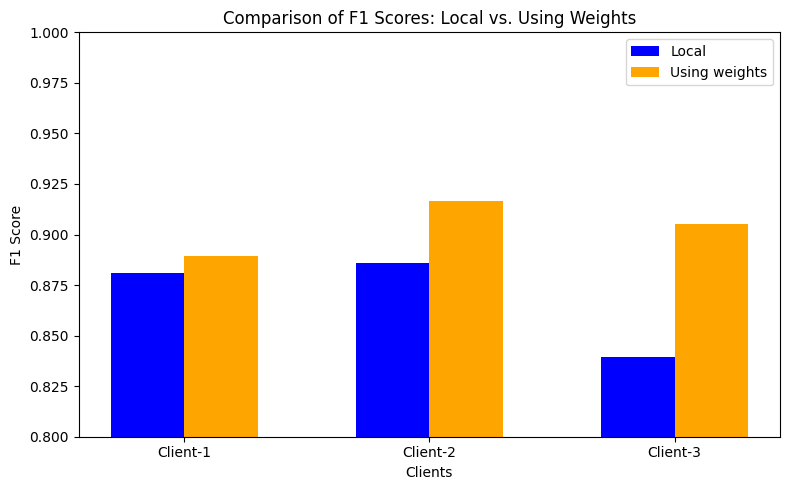

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define clients and F1 Scores
clients = ["Client-1", "Client-2", "Client-3"]
f1_local = [0.8808, 0.8858, 0.8395]
f1_weighted = [0.8892, 0.9166, 0.905]

# Set bar positions
x = np.arange(len(clients))
bar_width = 0.3

# Create bar plot
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - bar_width/2, f1_local, bar_width, label="Local", color='blue')
ax.bar(x + bar_width/2, f1_weighted, bar_width, label="Using weights", color='orange')

# Labels and formatting
ax.set_xlabel("Clients")
ax.set_ylabel("F1 Score")
ax.set_title("Comparison of F1 Scores: Local vs. Using Weights")
ax.set_xticks(x)
ax.set_xticklabels(clients)
ax.set_ylim(0.8, 1.0)
ax.legend()

plt.tight_layout()
plt.show()


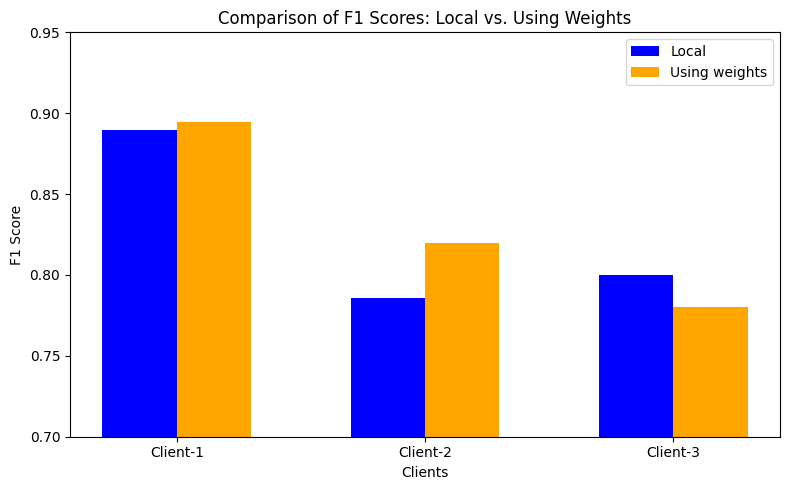

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define clients and F1 Scores
clients = ["Client-1", "Client-2", "Client-3"]
f1_local = [0.8897, 0.7857, 0.7999]
f1_weighted = [0.8943, 0.8196, 0.7804]

# Set bar positions
x = np.arange(len(clients))
bar_width = 0.3

# Create bar plot
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - bar_width/2, f1_local, bar_width, label="Local", color='blue')
ax.bar(x + bar_width/2, f1_weighted, bar_width, label="Using weights", color='orange')

# Labels and formatting
ax.set_xlabel("Clients")
ax.set_ylabel("F1 Score")
ax.set_title("Comparison of F1 Scores: Local vs. Using Weights")
ax.set_xticks(x)
ax.set_xticklabels(clients)
ax.set_ylim(0.7, 0.95)  # Adjusting limits for better visualization
ax.legend()

plt.tight_layout()
plt.show()


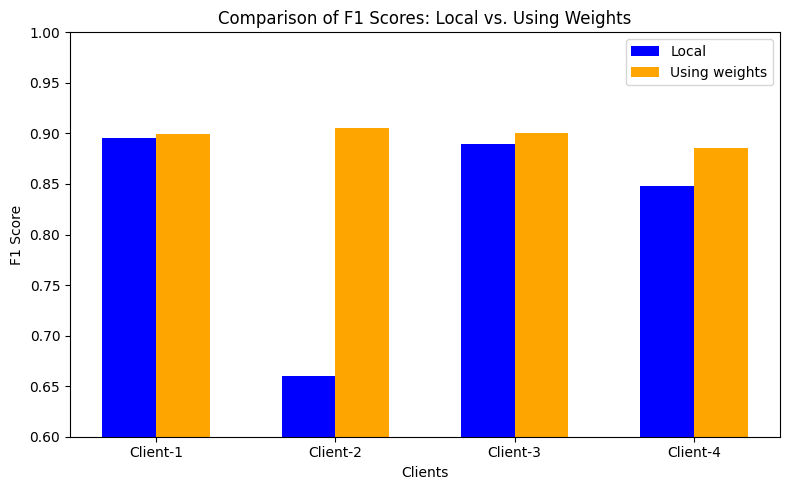

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define clients and F1 Scores
clients = ["Client-1", "Client-2", "Client-3", "Client-4"]
f1_local = [0.8952, 0.66, 0.8899, 0.8484]
f1_weighted = [0.8991, 0.9058, 0.9009, 0.8854]

# Set bar positions
x = np.arange(len(clients))
bar_width = 0.3

# Create bar plot
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - bar_width/2, f1_local, bar_width, label="Local", color='blue')
ax.bar(x + bar_width/2, f1_weighted, bar_width, label="Using weights", color='orange')

# Labels and formatting
ax.set_xlabel("Clients")
ax.set_ylabel("F1 Score")
ax.set_title("Comparison of F1 Scores: Local vs. Using Weights")
ax.set_xticks(x)
ax.set_xticklabels(clients)
ax.set_ylim(0.6, 1.0)  # Adjusting limits for better visualization
ax.legend()

plt.tight_layout()
plt.show()


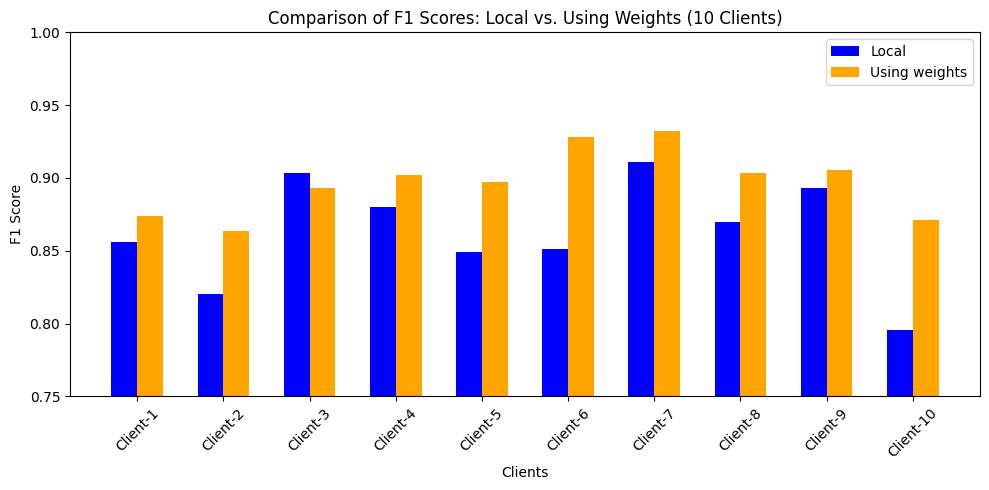

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define clients and F1 Scores
clients = ["Client-1", "Client-2", "Client-3", "Client-4", "Client-5",
           "Client-6", "Client-7", "Client-8", "Client-9", "Client-10"]

f1_local = [0.8563, 0.8205, 0.9034, 0.8799, 0.8494, 0.8510, 0.9108, 0.8695, 0.8932, 0.7959]
f1_weighted = [0.8739, 0.8634, 0.8931, 0.9019, 0.8969, 0.9278, 0.9320, 0.9032, 0.9056, 0.8712]

# Set bar positions
x = np.arange(len(clients))
bar_width = 0.3

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - bar_width/2, f1_local, bar_width, label="Local", color='blue')
ax.bar(x + bar_width/2, f1_weighted, bar_width, label="Using weights", color='orange')

# Labels and formatting
ax.set_xlabel("Clients")
ax.set_ylabel("F1 Score")
ax.set_title("Comparison of F1 Scores: Local vs. Using Weights (10 Clients)")
ax.set_xticks(x)
ax.set_xticklabels(clients, rotation=45)
ax.set_ylim(0.75, 1.0)  # Adjusting limits for better visualization
ax.legend()

plt.tight_layout()
plt.show()


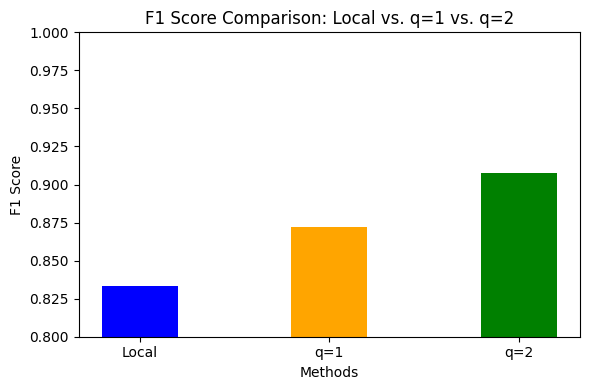

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define categories and F1 Scores (only Local, q=1, q=2)
categories = ["Local", "q=1", "q=2"]
f1_scores = [0.8333, 0.8722, 0.9075]

# Set bar positions
x = np.arange(len(categories))

# Create bar plot with reduced width
plt.figure(figsize=(6, 4))
plt.bar(x, f1_scores, color=['blue', 'orange', 'green'], width=0.4)  # Reduced width

# Labels and formatting
plt.xlabel("Methods")
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison: Local vs. q=1 vs. q=2")
plt.xticks(x, categories)
plt.ylim(0.8, 1.0)  # Adjusting limits for better visualization

# Show plot
plt.tight_layout()
plt.show()


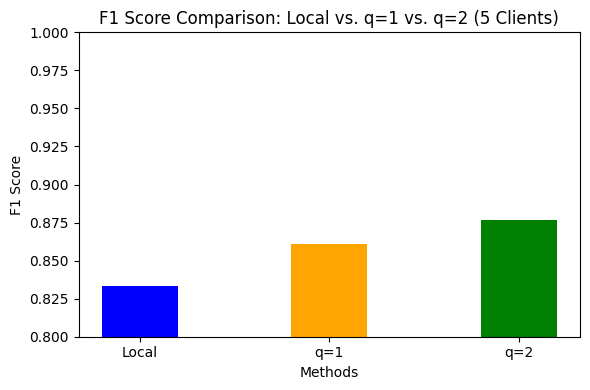

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define categories and F1 Scores (only Local, q=1, q=2)
categories = ["Local", "q=1", "q=2"]
f1_scores = [0.8333, 0.8606, 0.8764]

# Set bar positions
x = np.arange(len(categories))

# Create bar plot with reduced width
plt.figure(figsize=(6, 4))
plt.bar(x, f1_scores, color=['blue', 'orange', 'green'], width=0.4)  # Reduced width

# Labels and formatting
plt.xlabel("Methods")
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison: Local vs. q=1 vs. q=2 (5 Clients)")
plt.xticks(x, categories)
plt.ylim(0.8, 1.0)  # Adjusting limits for better visualization

# Show plot
plt.tight_layout()
plt.show()


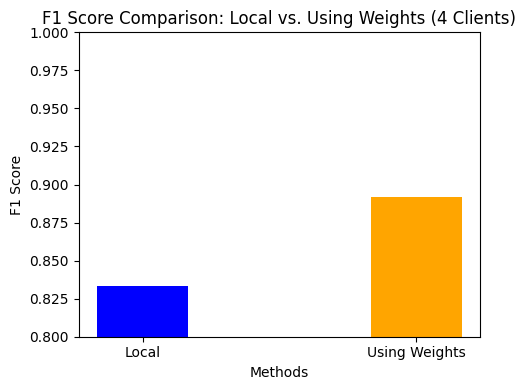

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define categories and F1 Scores (only Local and Using Weights)
categories = ["Local", "Using Weights"]
f1_scores = [0.8333, 0.8921]

# Set bar positions (closer together)
x = np.arange(len(categories)) * 0.6  # Reduce spacing by multiplying by a smaller factor

# Create bar plot with reduced width
plt.figure(figsize=(5, 4))
plt.bar(x, f1_scores, color=['blue', 'orange'], width=0.2)  # Reduced width

# Labels and formatting
plt.xlabel("Methods")
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison: Local vs. Using Weights (4 Clients)")
plt.xticks(x, categories)
plt.ylim(0.8, 1.0)  # Adjusting limits for better visualization

# Show plot
plt.tight_layout()
plt.show()


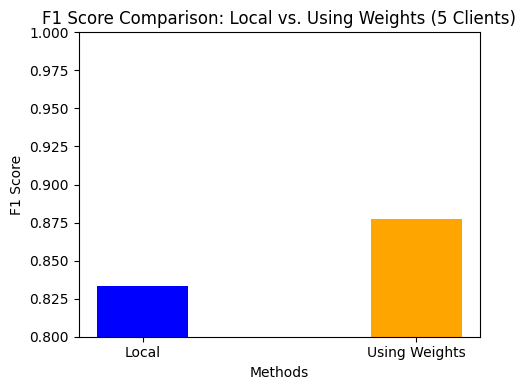

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define categories and F1 Scores (only Local and Using Weights)
categories = ["Local", "Using Weights"]
f1_scores = [0.8333, 0.8771]

# Set bar positions (closer together)
x = np.arange(len(categories)) * 0.6  # Reduce spacing between bars

# Create bar plot with reduced width
plt.figure(figsize=(5, 4))
plt.bar(x, f1_scores, color=['blue', 'orange'], width=0.2)  # Reduced width

# Labels and formatting
plt.xlabel("Methods")
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison: Local vs. Using Weights (5 Clients)")
plt.xticks(x, categories)
plt.ylim(0.8, 1.0)  # Adjusting limits for better visualization

# Show plot
plt.tight_layout()
plt.show()


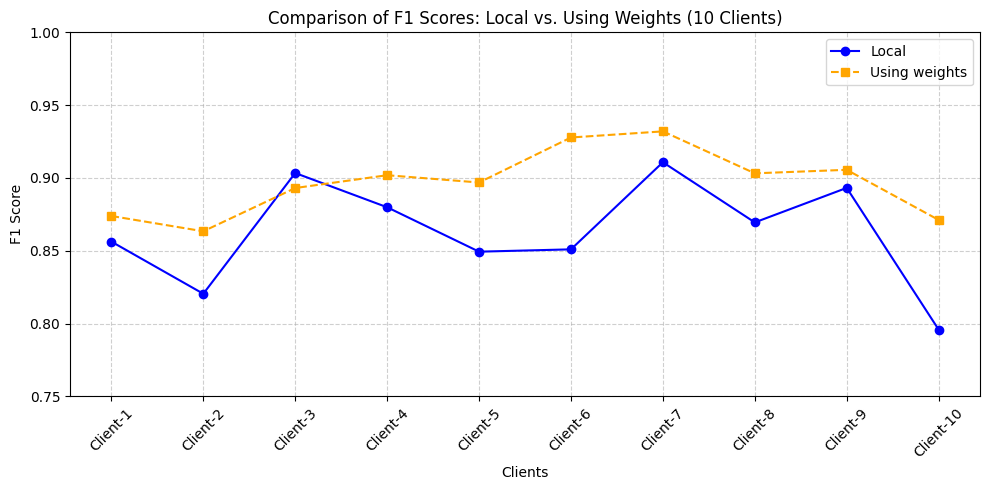

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define clients and F1 Scores
clients = ["Client-1", "Client-2", "Client-3", "Client-4", "Client-5",
           "Client-6", "Client-7", "Client-8", "Client-9", "Client-10"]

f1_local = [0.8563, 0.8205, 0.9034, 0.8799, 0.8494, 0.8510, 0.9108, 0.8695, 0.8932, 0.7959]
f1_weighted = [0.8739, 0.8634, 0.8931, 0.9019, 0.8969, 0.9278, 0.9320, 0.9032, 0.9056, 0.8712]

# Create line plot
plt.figure(figsize=(10, 5))

plt.plot(clients, f1_local, marker='o', linestyle='-', color='blue', label="Local")
plt.plot(clients, f1_weighted, marker='s', linestyle='--', color='orange', label="Using weights")

# Labels and formatting
plt.xlabel("Clients")
plt.ylabel("F1 Score")
plt.title("Comparison of F1 Scores: Local vs. Using Weights (10 Clients)")
plt.xticks(rotation=45)
plt.ylim(0.75, 1.0)  # Adjusting limits for better visualization
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


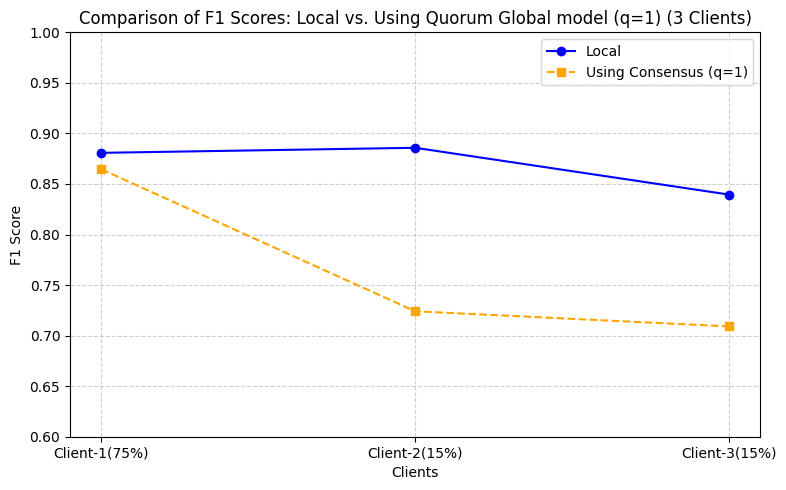

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define clients and F1 Scores
clients = ["Client-1(75%)", "Client-2(15%)", "Client-3(15%)"]
f1_local = [0.8808, 0.8858, 0.8395]
f1_consensus_q1 = [0.8645, 0.7241, 0.7091]

# Create line plot
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(clients, f1_local, marker='o', linestyle='-', color='blue', label="Local")
ax.plot(clients, f1_consensus_q1, marker='s', linestyle='--', color='orange', label="Using Consensus (q=1)")

# Labels and formatting
ax.set_xlabel("Clients")
ax.set_ylabel("F1 Score")
ax.set_title("Comparison of F1 Scores: Local vs. Using Quorum Global model (q=1) (3 Clients)")
ax.set_ylim(0.6, 1.0)  # Adjusting limits for better visualization
ax.legend()

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


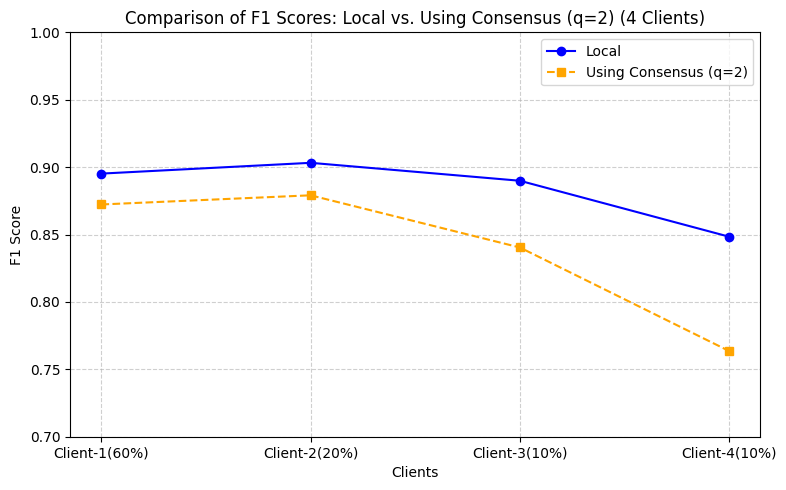

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define clients and F1 Scores
clients = ["Client-1(60%)", "Client-2(20%)", "Client-3(10%)", "Client-4(10%)"]
f1_local = [0.8952, 0.9032, 0.8899, 0.8484]
f1_consensus_q2 = [0.8723, 0.8791, 0.8404, 0.7636]

# Create line plot
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(clients, f1_local, marker='o', linestyle='-', color='blue', label="Local")
ax.plot(clients, f1_consensus_q2, marker='s', linestyle='--', color='orange', label="Using Consensus (q=2)")

# Labels and formatting
ax.set_xlabel("Clients")
ax.set_ylabel("F1 Score")
ax.set_title("Comparison of F1 Scores: Local vs. Using Consensus (q=2) (4 Clients)")
ax.set_ylim(0.7, 1.0)  # Adjusting limits for better visualization
ax.legend()

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
